In [22]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [23]:
X = load_boston().data
Y = load_boston().target

In [24]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [25]:
clf = SGDRegressor()
clf.fit(X, Y)
print(mean_squared_error(Y, clf.predict(X)))

22.99814179656327


In [26]:
print(X.shape, Y.shape)
print(X[:3, :])

(506, 13) (506,)
[[-0.41771335  0.28482986 -1.2879095  -0.27259857 -0.14421743  0.41367189
  -0.12001342  0.1402136  -0.98284286 -0.66660821 -1.45900038  0.44105193
  -1.0755623 ]
 [-0.41526932 -0.48772236 -0.59338101 -0.27259857 -0.74026221  0.19427445
   0.36716642  0.55715988 -0.8678825  -0.98732948 -0.30309415  0.44105193
  -0.49243937]
 [-0.41527165 -0.48772236 -0.59338101 -0.27259857 -0.74026221  1.28271368
  -0.26581176  0.55715988 -0.8678825  -0.98732948 -0.30309415  0.39642699
  -1.2087274 ]]


### Gradient Descent Implementation for Linear Regression

In [27]:
import tqdm
import time
import random

**I am going to write a function instead of a class and all the calculations are done in function and mean_squared_error, weights and trend of error are returned from the function**

In [28]:
def GradDescLinReg(X, y, max_iters = 10000):
    '''
    Gradient Descent Implementation for Linear Regression which calculates the optimal weights given input X and actual Y values
    max_iters indicate maximum iterations for which weights have to be updated
    Returns weights, mean_squared_error and trend of mean_squared_error over iterations
    '''
    # initial weights and bias (b) are kept random with uniform distribution in range (-1, 1) and
    # weights have a length equal to number of columns of input X
    weights = np.random.uniform(-1, 1, size=(X.shape[1],))
    b = np.random.uniform(-1, 1)
    
    # r - learning rate is initialized with value 1
    r = 1
    # iter_count stores number of iterations. (loop may break when difference in weight vector is very less)
    iter_count = 0
    # error_trend stores trend of mean_squared_error over iterations
    error_trend = []
    
    # using tqdm for plotting bar for iterations
    for it in tqdm.tnrange(max_iters):
        # Below variables are change (Delta) in weight vector and bias and ms_error is mean_squared_error for this iteration
        delta_weights = np.zeros((X.shape[1], ))
        delta_b = 0
        ms_error = 0
        
        # Sigma part implemented in for loop
        for index, row in enumerate(X):
            dist_error = (y[index] - np.dot(weights, row) - b)
            delta_weights = delta_weights + (-2*dist_error*row)
            delta_b = delta_b + (-2*dist_error)
            ms_error= ms_error + (dist_error**2)
        
        # dividing by N (i.e. number of  rows) for all summations
        delta_weights = delta_weights/len(X)
        delta_b = delta_b/len(X)
        ms_error = ms_error/len(X)
        error_trend.append(ms_error)
        
        # Calculating new weights and bias for next iteration
        new_weights = weights - (r*delta_weights)
        new_b = b - (r*delta_b)
        
        # weights_change to check if we can exit main loop if the values are very less
        weights_change = np.abs(new_weights - weights)
        
        # updating r - learning rate
        if (0.5*r) >= 0.001:
            r = 0.5 * r
        
        # updating new weights and bias (b)
        weights = new_weights
        b = new_b
        
        iter_count = it
        
        # if weights_change is very less for all values in the vector we can exit main loop
        if ((weights_change <= 0.0001).sum() == len(weights)) and (np.abs(new_b - b) <= 0.0001):
            break
    
    print("Number of iterations it took to converge:", iter_count)
    
    # Calculating mean_squared_error for final weights
    #mean_squared_error = 0
    #for index, row in enumerate(X):
    #error = (y[index] - np.dot(weights, row) - b)
    #    mean_squared_error = mean_squared_error + (error**2)
    #mean_squared_error = mean_squared_error/len(X)
    
    #print("Mean squared error =", mean_squared_error)
    
    # Calculating predicted values for input data
    y_pred = []
    for row in X:
        yd = np.dot(weights, row) + b
        y_pred.append(yd)
    
    ms_error = mean_squared_error(y, y_pred)
    print("Mean squared error =", ms_error)
    
    # Building Result
    result = {}
    result['mean_squared_error'] = ms_error
    result['weights'] = weights
    result['bias'] = b
    result['error_trend'] = error_trend
    result['predicted_y'] = y_pred
    
    return result

**After checking some ratios to change r values, decided to update r by r=r*0.5 and kept a minimum threshold (i.e. 10^-3) below which r is not decreased further. Here r is learning rate value which is multiplied to error before updating weights**

**Decided to update r value as mentioned above, as mean_squared_error is very high for other methods**

In [29]:
start = time.time()
GradDescRes = GradDescLinReg(X, Y)  # Main code in this block
GradDescTime = time.time() - start
print("Time taken:", GradDescTime)

Number of iterations it took to converge: 4722
Mean squared error = 21.919512257433095
Time taken: 13.123503684997559


**Loop may stop in between as I wrote a break statement which executes if all components in weight vector doesnt change much (thre: 10^-4)**

**Plotting Mean squared error over iterations**

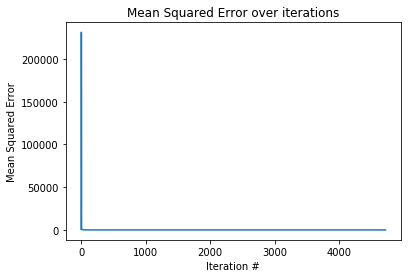

In [30]:
from matplotlib import pyplot as plt
plt.plot(GradDescRes['error_trend'])
plt.xlabel("Iteration #")
plt.ylabel("Mean Squared Error")
plt.title("Mean Squared Error over iterations")
plt.show()

In [31]:
print("First 50 values for error values:\n")
print(GradDescRes['error_trend'][:50])
print("="*50)
print("\nLast 30 values for error values:\n")
print(GradDescRes['error_trend'][-30:])

First 50 values for error values:

[569.4302424555467, 2657.2238947638452, 54479.577142347414, 231389.5827505248, 65176.544450557376, 3610.725165115448, 1390.1004429924135, 916.8904783887175, 753.977955522096, 685.6875630701919, 654.3513757277506, 624.4960868711681, 596.0517080103535, 568.9515583919756, 543.1321086717961, 518.5328319752391, 495.0960619970247, 472.76685780718446, 451.49287504651454, 431.2242432094875, 411.91344872692673, 393.515223574337, 375.986439144742, 359.28600513722307, 343.3747732241075, 328.21544527096876, 313.77248589425596, 300.0120391515635, 286.9018491692166, 274.41118452109725, 262.510766181418, 251.17269888253696, 240.3704057168882, 230.0785658297018, 220.27305505644463, 210.93088936581054, 202.0301709756594, 193.55003701558664, 185.4706106157618, 177.77295430736828, 170.43902562539526, 163.45163480969595, 156.79440450514684, 150.45173136642578, 144.40874947739457, 138.65129549932746, 133.1658754662777, 127.93963314973303, 122.96031991839864, 118.216266022

**As we see in graph we may not need lot of iterations to converge**

### Doing Linear Regression on SGD Regressor

In [32]:
clf = SGDRegressor()
start = time.time()
clf.fit(X, Y)

sklearnSGDres = {}
sklearnSGDres['predicted_y'] = clf.predict(X)
sklearnSGDres['mean_squared_error'] = mean_squared_error(Y, sklearnSGDres['predicted_y'])
sklearnSGDres['weights'] = clf.coef_
sklearnSGDres['bias'] = clf.intercept_

print("Mean Squared error:", sklearnSGDres['mean_squared_error'])
skleanSGDTime = time.time()-start
print("Time taken:", skleanSGDTime)

Mean Squared error: 22.763074510179187
Time taken: 0.007000446319580078


**We see our model is slightly better than SGDRegressor this may be due to our minimum threshold of value r (learning rate). If minimum threshold of r is not considered, the results are much worse as the model is not learning anything after some iterations**

### Stochastic Gradient Descent Implementation for Linear Regression

In [33]:
def SGDLinReg(X, y, max_iters = 10000, k = 10):
    '''
    Stochastic Gradient Descent Implementation for Linear Regression which calculates the optimal weights given input X and actual Y values
    max_iters indicate maximum iterations for which weights have to be updated
    k indicates number of rows used to update weights in every iteration
    Returns weights, mean_squared_error. trend of error is not calculated as we dont want to iterate through all rows for every iteration
    '''
    # initial weights and bias (b) are kept random with uniform distribution in range (-1, 1) and
    # weights have a length equal to number of columns of input X
    weights = np.random.uniform(-1, 1, size=(X.shape[1],))
    b = np.random.uniform(-1, 1)
    
    # r - learning rate is initialized with value 1
    r = 1
    # iter_count stores number of iterations. (loop may break when difference in weight vector is very less)
    iter_count = 0
    
    # using tqdm for plotting bar for iterations
    for it in tqdm.tnrange(max_iters):
        # Below variables are change (Delta) in weight vector and bias and ms_error is mean_squared_error for this iteration
        delta_weights = np.zeros((X.shape[1], ))
        delta_b = 0
        
        # Selecting k random rows to calculate the summation
        indices = list(range(len(X)))
        random.shuffle(indices)
        indices = indices[:k]
        
        # Sigma part implemented in for loop
        for index in indices:
            row = X[index]
            dist_error = (y[index] - np.dot(weights, row) - b)
            delta_weights = delta_weights + (-2*dist_error*row)
            delta_b = delta_b + (-2*dist_error)
        
        # dividing by N (i.e. number of  rows) for all summations
        delta_weights = delta_weights/k
        delta_b = delta_b/k
        
        # Calculating new weights and bias for next iteration
        new_weights = weights - (r*delta_weights)
        new_b = b - (r*delta_b)
        
        # weights_change to check if we can exit main loop if the values are very less
        weights_change = np.abs(new_weights - weights)
        
        # updating r - learning rate
        if (0.5*r) >= 0.001:
            r = 0.5 * r
        
        # updating new weights and bias (b)
        weights = new_weights
        b = new_b
        
        iter_count = it
        
        # if weights_change is very less for all values in the vector we can exit main loop
        if ((weights_change <= 0.0001).sum() == len(weights)) and (np.abs(new_b - b) <= 0.0001):
            break
    
    print("Number of iterations it took to converge:", iter_count)
    
    # Calculating mean_squared_error for final weights
    mean_squared_error = 0
    for index, row in enumerate(X):
        error = (y[index] - np.dot(weights, row) - b)
        mean_squared_error = mean_squared_error + (error**2)
    mean_squared_error = mean_squared_error/len(X)
    
    print("Mean squared error =", mean_squared_error)
    
    # Calculating predicted values for input data
    y_pred = []
    for row in X:
        yd = np.dot(weights, row) + b
        y_pred.append(yd)
    
    # Building Result
    result = {}
    result['mean_squared_error'] = mean_squared_error
    result['weights'] = weights
    result['bias'] = b
    result['predicted_y'] = y_pred
    
    return result

**Every thing is same including updating of r and having a minimum threshold for it. Only obvious change that is done is Instead of using all rows in Summation part I randomly choose k rows to do that part. and k can be passed into function. default k is 10**

In [34]:
start = time.time()
SGDres = SGDLinReg(X, Y)  # Main code in this block
SGDTime = time.time()-start
print("Time taken:", SGDTime)

Number of iterations it took to converge: 9999
Mean squared error = 22.374512646122536
Time taken: 5.203030824661255


**As you see it does as good as our previous model Gradient Descent and takes less time which is great.**

## Putting All results together

**Plotting graphs of predicted and actual data in three different plots**

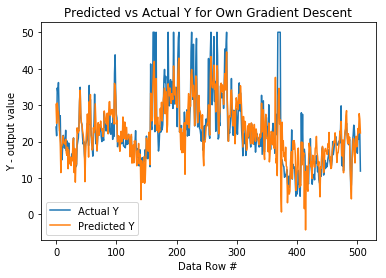

In [35]:
plt.plot(Y, label="Actual Y")
plt.plot(GradDescRes['predicted_y'], label="Predicted Y")
plt.xlabel("Data Row #")
plt.ylabel("Y - output value")
plt.title("Predicted vs Actual Y for Own Gradient Descent")
plt.legend()
plt.show()

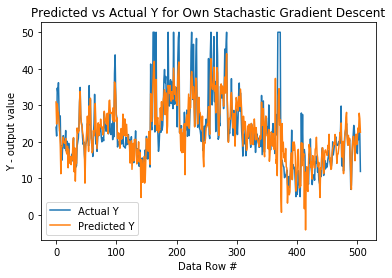

In [36]:
plt.plot(Y, label="Actual Y")
plt.plot(SGDres['predicted_y'], label="Predicted Y")
plt.xlabel("Data Row #")
plt.ylabel("Y - output value")
plt.title("Predicted vs Actual Y for Own Stachastic Gradient Descent")
plt.legend()
plt.show()

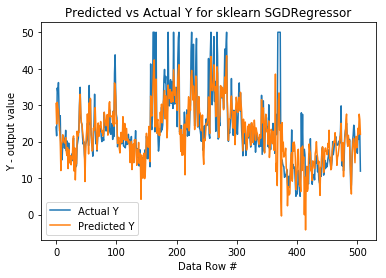

In [37]:
plt.plot(Y, label="Actual Y")
plt.plot(sklearnSGDres['predicted_y'], label="Predicted Y")
plt.xlabel("Data Row #")
plt.ylabel("Y - output value")
plt.title("Predicted vs Actual Y for sklearn SGDRegressor")
plt.legend()
plt.show()

**The results are not very clear as lot of data points are there. So let us see PrettyTable of weights MSE and Time taken to compute the results**

In [41]:
table = PrettyTable()
table.field_names = ['Column Name', 'Own GradDesc', 'Own SGD', 'sklearn SGD']
for i in range(X.shape[1]):
    table.add_row(['W'+str(i+1), np.round(GradDescRes['weights'][i], 3), np.round(SGDres['weights'][i], 3),\
                   np.round(sklearnSGDres['weights'][i], 3)])
table.add_row(['b (inercept)', np.round(GradDescRes['bias'], 3), np.round(SGDres['bias'], 3),\
               np.round(sklearnSGDres['bias'][0], 3)])
table.add_row(['Mean Sqaured Error', np.round(GradDescRes['mean_squared_error'], 3), np.round(SGDres['mean_squared_error'], 3),\
              np.round(sklearnSGDres['mean_squared_error'], 3)])
table.add_row(['Time for calc (in secs)', np.round(GradDescTime, 3), np.round(SGDTime, 3), np.round(skleanSGDTime, 3)])
print(table)

+-------------------------+--------------+---------+-------------+
|       Column Name       | Own GradDesc | Own SGD | sklearn SGD |
+-------------------------+--------------+---------+-------------+
|            W1           |    -0.886    |  -0.868 |    -0.662   |
|            W2           |    1.021     |  0.886  |    0.575    |
|            W3           |    0.006     |  -0.487 |    -0.329   |
|            W4           |    0.702     |  0.773  |    0.753    |
|            W5           |    -2.006    |  -2.025 |    -1.017   |
|            W6           |    2.703     |  2.634  |    3.101    |
|            W7           |    0.006     |  -0.035 |    -0.191   |
|            W8           |    -3.071    |  -3.209 |    -2.086   |
|            W9           |    2.287     |  0.934  |    0.928    |
|           W10           |    -1.665    |  -0.164 |    -0.564   |
|           W11           |    -2.047    |  -1.959 |    -1.883   |
|           W12           |    0.855     |  0.819  |    0.928 

**Summary from the results**
- **Our models did good as the Mean squared error of 2 models that we created are slightly less than sklearn SGDRegressor.**
- **But the time taken to calculate the results is not that great. sklearn's algorithm is much faster than our models. Time taken may be reduced by decreasing k value and number of iterations further. we used k = 10 in our implementation**
- **Regading weights of models, They are not exactly same for all models but the polarity (+ve or -ve) and magnitude (how large they are) is almost same for all models**